In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
data = pd.read_excel('../stage_report/Sutton_Borough_Data.xlsx')
data.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000382-01012019,01 Jan 2019,2019,07:54:10,7,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,...,893.0,Sutton,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1
1,000553-01012019,01 Jan 2019,2019,16:49:19,16,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,437.0,Wallington,NaN,NaN,2.0,2.0,2.0,2.0,666.0,1
2,000577-01012019,01 Jan 2019,2019,18:16:05,18,Special Service,Special Service,Assist other agencies,Dwelling,House - single occupancy,...,382.0,Wallington,424.0,Croydon,2.0,2.0,2.0,4.0,1332.0,1
3,000624-01012019,01 Jan 2019,2019,21:08:28,21,Fire,Primary Fire,NaN,Outdoor Structure,Other outdoor equipment/machinery,...,364.0,Sutton,691.0,Surbiton,2.0,2.0,2.0,3.0,999.0,1
4,000730-02012019,02 Jan 2019,2019,06:10:00,6,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,...,283.0,Sutton,620.0,Wallington,2.0,2.0,2.0,1.0,333.0,1


In [3]:
data.isnull().sum()

IncidentNumber                               0
DateOfCall                                   0
CalYear                                      0
TimeOfCall                                   0
HourOfCall                                   0
IncidentGroup                                0
StopCodeDescription                          0
SpecialServiceType                        5156
PropertyCategory                             0
PropertyType                                 0
AddressQualifier                             0
Postcode_full                             3777
Postcode_district                            0
UPRN                                         0
USRN                                         0
IncGeo_BoroughCode                           0
IncGeo_BoroughName                           0
ProperCase                                   0
IncGeo_WardCode                              0
IncGeo_WardName                              0
IncGeo_WardNameNew                           0
Easting_m    

In [4]:
data_subset = data[['DateOfCall', 'TimeOfCall', 'HourOfCall', 'IncidentGroup', 'FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending']]

data_subset.head()

,DateOfCall,TimeOfCall,HourOfCall,IncidentGroup,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending
0,01 Jan 2019,07:54:10,7,Fire,893.0,NaN,1.0,1.0
1,01 Jan 2019,16:49:19,16,False Alarm,437.0,NaN,2.0,2.0
2,01 Jan 2019,18:16:05,18,Special Service,382.0,424.0,2.0,2.0
3,01 Jan 2019,21:08:28,21,Fire,364.0,691.0,2.0,2.0
4,02 Jan 2019,06:10:00,6,False Alarm,283.0,620.0,2.0,2.0


In [5]:
data_subset.isnull().sum()

DateOfCall                              0
TimeOfCall                              0
HourOfCall                              0
IncidentGroup                           0
FirstPumpArriving_AttendanceTime      315
SecondPumpArriving_AttendanceTime    4591
NumStationsWithPumpsAttending         100
NumPumpsAttending                     100
dtype: int64

In [6]:
data_subset = data_subset.drop('SecondPumpArriving_AttendanceTime', axis=1)

In [7]:
data_subset.isnull().sum()

DateOfCall                            0
TimeOfCall                            0
HourOfCall                            0
IncidentGroup                         0
FirstPumpArriving_AttendanceTime    315
NumStationsWithPumpsAttending       100
NumPumpsAttending                   100
dtype: int64

# Handling Missing Values

In [8]:
# Handling missing values
data_subset['FirstPumpArriving_AttendanceTime'].fillna(data_subset['FirstPumpArriving_AttendanceTime'].median(), inplace=True)
data_subset['NumStationsWithPumpsAttending'].fillna(data_subset['NumStationsWithPumpsAttending'].median(), inplace=True)
data_subset['NumPumpsAttending'].fillna(data_subset['NumPumpsAttending'].median(), inplace=True)

In [9]:
data_subset.isnull().sum()

DateOfCall                          0
TimeOfCall                          0
HourOfCall                          0
IncidentGroup                       0
FirstPumpArriving_AttendanceTime    0
NumStationsWithPumpsAttending       0
NumPumpsAttending                   0
dtype: int64

In [42]:
# Combining DateOfCall and TimeOfCall into a single datetime column
data_subset['DateTime'] = pd.to_datetime(data_subset['DateOfCall'] + ' ' + data_subset['TimeOfCall'])

# Feature Engineering: Extracting day of the week and part of the day
data_subset['DayOfWeek'] = data_subset['DateTime'].dt.day_name()
data_subset['PartOfDay'] = pd.cut(data_subset['DateTime'].dt.hour, 
                                          bins=[0, 6, 12, 18, 24], 
                                          labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                          right=False)


In [11]:
data_subset.head()

,DateOfCall,TimeOfCall,HourOfCall,IncidentGroup,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,DateTime,DayOfWeek,PartOfDay
0,01 Jan 2019,07:54:10,7,Fire,893.0,1.0,1.0,2019-01-01 07:54:10,Tuesday,Morning
1,01 Jan 2019,16:49:19,16,False Alarm,437.0,2.0,2.0,2019-01-01 16:49:19,Tuesday,Afternoon
2,01 Jan 2019,18:16:05,18,Special Service,382.0,2.0,2.0,2019-01-01 18:16:05,Tuesday,Evening
3,01 Jan 2019,21:08:28,21,Fire,364.0,2.0,2.0,2019-01-01 21:08:28,Tuesday,Evening
4,02 Jan 2019,06:10:00,6,False Alarm,283.0,2.0,2.0,2019-01-02 06:10:00,Wednesday,Morning


# Time Series Analysis

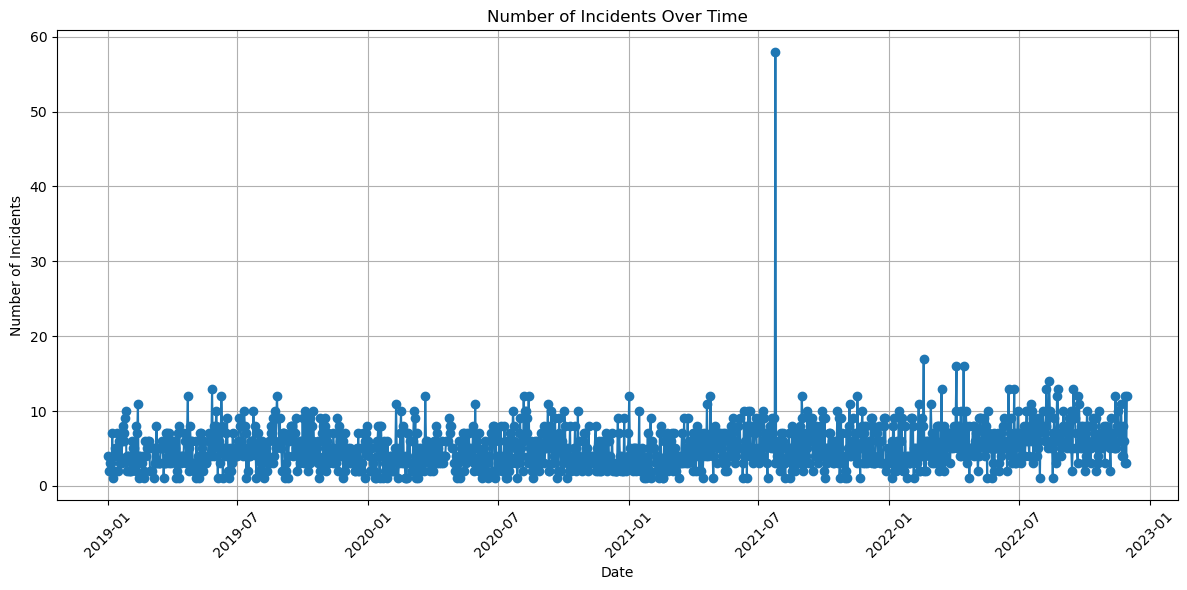

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# First, ensure that 'DateOfCall' and 'TimeOfCall' are combined into a datetime column
data_subset['DateTime'] = pd.to_datetime(data_subset['DateOfCall'] + ' ' + data_subset['TimeOfCall'])

# Grouping by DateTime to count incidents per day
time_series_data = data_subset.groupby(data_subset['DateTime'].dt.date).size()

# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data.values, marker='o', linestyle='-')
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


# Histograms

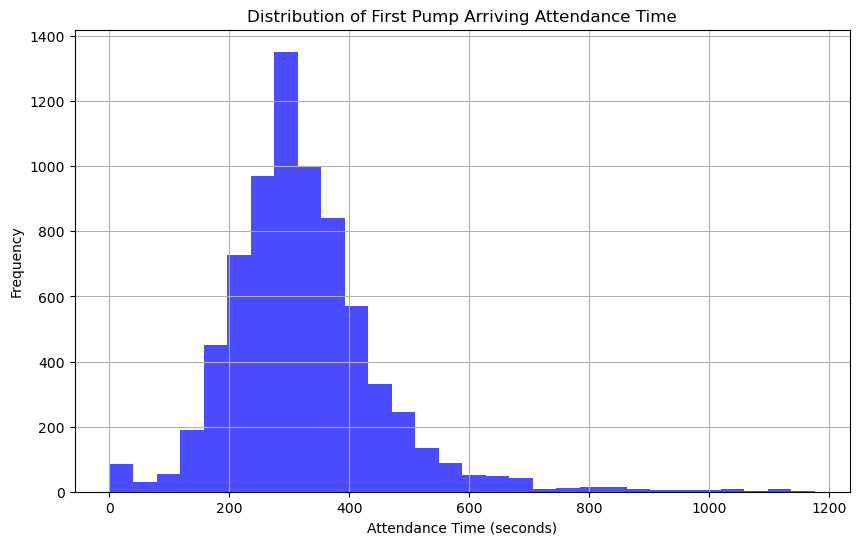

In [13]:
# Creating a histogram for the distribution of FirstPumpArriving_AttendanceTime
plt.figure(figsize=(10, 6))
plt.hist(data_subset['FirstPumpArriving_AttendanceTime'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of First Pump Arriving Attendance Time')
plt.xlabel('Attendance Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


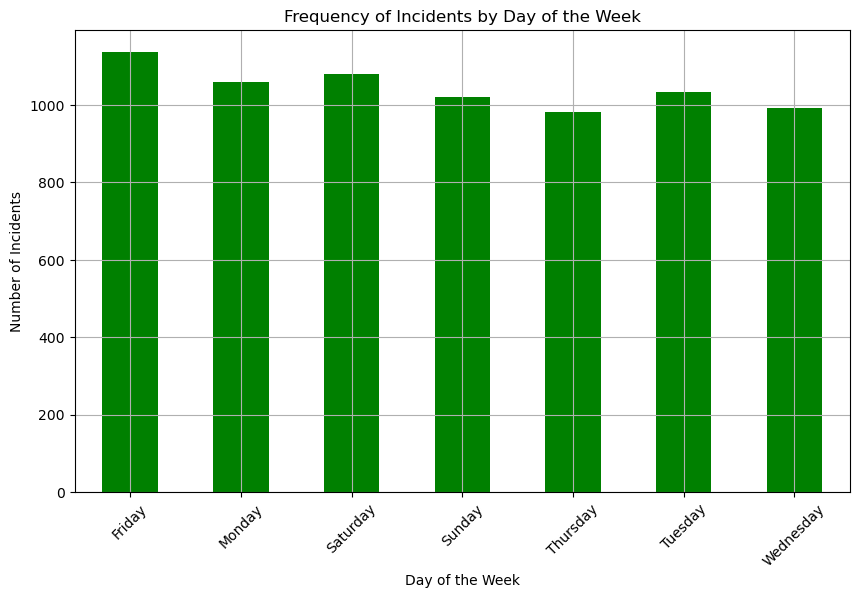

In [14]:
# Creating a bar chart for the frequency of incidents by DayOfWeek
day_of_week_counts = data_subset['DayOfWeek'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='green')
plt.title('Frequency of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


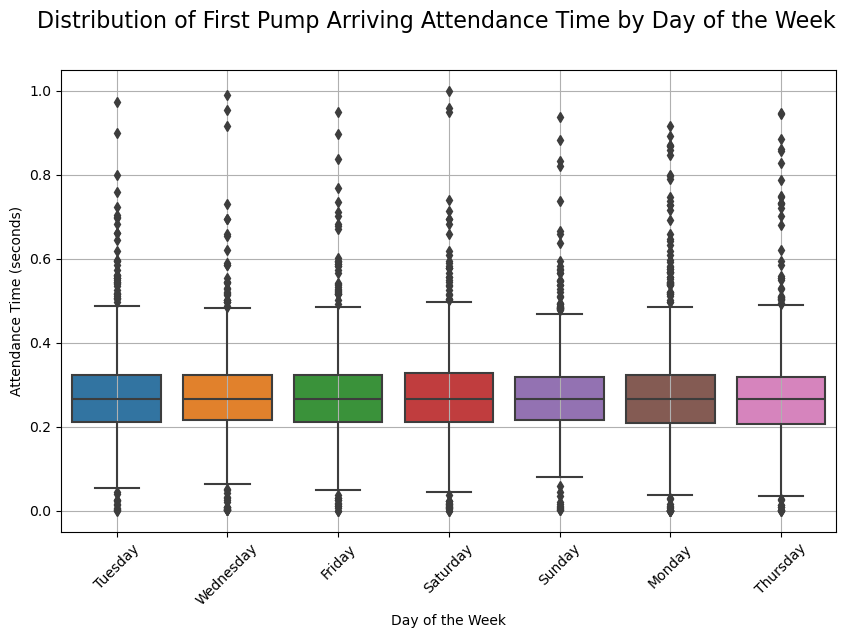

In [43]:
import seaborn as sns

# Now, creating the box plot for the distribution of FirstPumpArriving_AttendanceTime across days of the week
plt.figure(figsize=(10, 6))
plt.suptitle('Distribution of First Pump Arriving Attendance Time by Day of the Week', fontsize=16)
sns.boxplot(x='DayOfWeek', y='FirstPumpArriving_AttendanceTime', data=data_subset)
plt.xlabel('Day of the Week')
plt.ylabel('Attendance Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Re-initializing the MinMaxScaler
scaler = MinMaxScaler()

# Columns to be normalized
columns_to_normalize = ['FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending']

# Applying the Min-Max normalization to the selected columns
data_subset[columns_to_normalize] = scaler.fit_transform(data_subset[columns_to_normalize])

# Checking the top of the dataset to ensure normalization
normalized_data_head = data_subset[columns_to_normalize].head()
normalized_data_head


,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending
0,0.759149,0.0,0.0
1,0.371064,0.2,0.2
2,0.324255,0.2,0.2
3,0.308936,0.2,0.2
4,0.240000,0.2,0.2


In [17]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (70% train, 30% test)
train_data, test_data = train_test_split(data_subset, test_size=0.3, random_state=42)

# Display the shape of the training and testing data to confirm the split
train_shape = train_data.shape
test_shape = test_data.shape
train_shape, test_shape


((5110, 10), (2191, 10))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

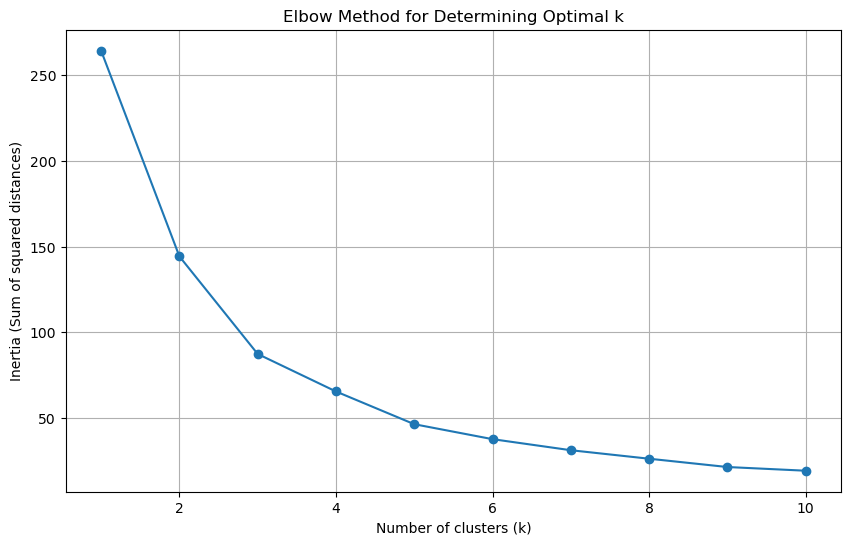

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extracting the relevant columns for clustering
features_for_clustering = train_data[['FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending']]

# Using the elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_for_clustering)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph to determine the optimal k
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()


In [19]:
from sklearn.cluster import KMeans

# Applying K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
train_data['Cluster'] = kmeans.fit_predict(train_data[['FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending']])

# Extracting the centroids of each cluster
cluster_centers = kmeans.cluster_centers_

# Analyzing the distribution of data points in each cluster
cluster_distribution = train_data['Cluster'].value_counts()

# Printing the cluster centers and their distribution
print("Cluster Centers:\n", cluster_centers)
print("\nCluster Distribution:\n", cluster_distribution)


Cluster Centers:
 [[ 2.82569537e-01 -1.94289029e-16  5.68989300e-16]
 [ 2.63290437e-01  1.35575407e-01  2.16184971e-01]
 [ 2.64353034e-01  6.14814815e-01  7.48148148e-01]]

Cluster Distribution:
 Cluster
0    3072
1    1903
2     135
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
train_data

,DateOfCall,TimeOfCall,HourOfCall,IncidentGroup,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,DateTime,DayOfWeek,PartOfDay,Cluster
4818,08 Oct 2021,22:04:44,22,False Alarm,0.251915,0.2,0.2,2021-10-08 22:04:44,Friday,Evening,1
1748,03 Jan 2020,18:32:33,18,False Alarm,0.192340,0.0,0.2,2020-01-03 18:32:33,Friday,Evening,1
6582,14 Aug 2022,12:14:55,12,False Alarm,0.313191,0.0,0.0,2022-08-14 12:14:55,Sunday,Afternoon,0
6217,23 Jun 2022,00:42:49,0,Special Service,0.305532,0.0,0.0,2022-06-23 00:42:49,Thursday,Night,0
2926,20 Sep 2020,21:58:37,21,Fire,0.205106,0.0,0.2,2020-09-20 21:58:37,Sunday,Evening,1
...,...,...,...,...,...,...,...,...,...,...,...
5191,17 Dec 2021,19:17:25,19,Special Service,0.265532,0.0,0.0,2021-12-17 19:17:25,Friday,Evening,0
5226,25 Dec 2021,22:54:18,22,Special Service,0.317447,0.0,0.0,2021-12-25 22:54:18,Saturday,Evening,0
5390,31 Jan 2022,16:25:24,16,Fire,0.209362,0.0,0.2,2022-01-31 16:25:24,Monday,Afternoon,1
860,11 Jul 2019,01:16:11,1,Special Service,0.281702,0.0,0.0,2019-07-11 01:16:11,Thursday,Night,0


# Prediction Model

# Model Training and Evaluation

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
# Initialize the label encoder dictionary
label_encoders = {}
# Encode 'DayOfWeek' and 'IncidentGroup'
for column in ['DayOfWeek', 'IncidentGroup']:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    label_encoders[column] = le
# Encode 'PartOfDay' and store the label encoder
le_part_of_day = LabelEncoder()
train_data['PartOfDay'] = le_part_of_day.fit_transform(train_data['PartOfDay'])
label_encoders['PartOfDay'] = le_part_of_day
# Features and Target
X = train_data[['DayOfWeek', 'IncidentGroup']]
y = train_data['PartOfDay']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
# Predicting on the test set
y_pred = rf_classifier.predict(X_test)
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
# Print classes to check their format
print("Encoded classes:", label_encoders['PartOfDay'].classes_)
# Convert classes to string for safe handling in classification_report
class_names = [str(cls) for cls in label_encoders['PartOfDay'].classes_]
# Retry generating the classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Encoded classes: ['Afternoon' 'Evening' 'Morning' 'Night']
Accuracy: 0.3294194390084801
Classification Report:
               precision    recall  f1-score   support

   Afternoon       0.36      0.56      0.44       539
     Evening       0.31      0.40      0.35       451
     Morning       0.19      0.06      0.09       340
       Night       0.00      0.00      0.00       203

    accuracy                           0.33      1533
   macro avg       0.22      0.26      0.22      1533
weighted avg       0.26      0.33      0.28      1533



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

   Afternoon       0.36      0.56      0.44       539
     Evening       0.31      0.40      0.35       451
     Morning       0.19      0.06      0.09       340
       Night       0.00      0.00      0.00       203

    accuracy                           0.33      1533
   macro avg       0.22      0.26      0.22      1533
weighted avg       0.26      0.33      0.28      1533



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


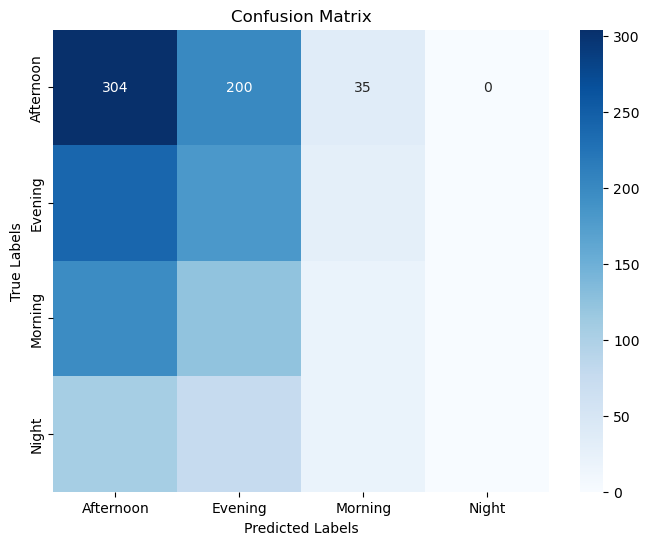

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the balance of the target classes
print("After SMOTE, counts of label '1':", sum(y_train_smote == 1))
print("After SMOTE, counts of label '0':", sum(y_train_smote == 0))


After SMOTE, counts of label '1': 1219
After SMOTE, counts of label '0': 1219


In [25]:
# Initialize the RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the balanced dataset
rf_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.15      0.22       539
           1       0.31      0.36      0.33       451
           2       0.24      0.43      0.31       340
           3       0.10      0.09      0.09       203

    accuracy                           0.27      1533
   macro avg       0.26      0.26      0.24      1533
weighted avg       0.29      0.27      0.25      1533

Confusion Matrix:
 [[ 82 180 209  68]
 [ 54 161 170  66]
 [ 51 108 147  34]
 [ 31  74  80  18]]


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm_classifier.predict(X_test)


In [28]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_names)  # Ensure class_names are defined as in previous steps

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.33529028049575993
Classification Report:
               precision    recall  f1-score   support

   Afternoon       0.36      0.56      0.44       539
     Evening       0.32      0.43      0.37       451
     Morning       0.19      0.06      0.09       340
       Night       0.00      0.00      0.00       203

    accuracy                           0.34      1533
   macro avg       0.22      0.26      0.22      1533
weighted avg       0.27      0.34      0.28      1533

Confusion Matrix:
 [[300 204  35   0]
 [228 194  29   0]
 [199 121  20   0]
 [105  78  20   0]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Adding new variables to 'data_subset' from 'data'
new_variables = ['PumpCount', 'PumpHoursRoundUp', 'Easting_rounded', 'Northing_rounded', 'Postcode_district', 'PropertyType']
data_subset = pd.concat([data_subset, data[new_variables]], axis=1)


In [30]:
data_subset

,DateOfCall,TimeOfCall,HourOfCall,IncidentGroup,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,DateTime,DayOfWeek,PartOfDay,PumpCount,PumpHoursRoundUp,Easting_rounded,Northing_rounded,Postcode_district,PropertyType
0,01 Jan 2019,07:54:10,7,Fire,0.759149,0.0,0.0,2019-01-01 07:54:10,Tuesday,Morning,1.0,1.0,526750,165250,SM1,Private Garden Shed
1,01 Jan 2019,16:49:19,16,False Alarm,0.371064,0.2,0.2,2019-01-01 16:49:19,Tuesday,Afternoon,2.0,2.0,526350,164750,SM1,Purpose Built Flats/Maisonettes - Up to 3 stor...
2,01 Jan 2019,18:16:05,18,Special Service,0.324255,0.2,0.2,2019-01-01 18:16:05,Tuesday,Evening,2.0,4.0,530550,163550,SM6,House - single occupancy
3,01 Jan 2019,21:08:28,21,Fire,0.308936,0.2,0.2,2019-01-01 21:08:28,Tuesday,Evening,2.0,3.0,523450,166250,KT4,Other outdoor equipment/machinery
4,02 Jan 2019,06:10:00,6,False Alarm,0.240000,0.2,0.2,2019-01-02 06:10:00,Wednesday,Morning,2.0,1.0,525250,163950,SM1,Self contained Sheltered Housing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,30 Nov 2022,18:31:42,18,Fire,0.287660,0.2,0.4,2022-11-30 18:31:42,Wednesday,Evening,3.0,3.0,526050,163650,SM2,Self contained Sheltered Housing
7297,30 Nov 2022,18:32:42,18,Special Service,0.439149,0.0,0.0,2022-11-30 18:32:42,Wednesday,Evening,1.0,1.0,523350,166250,KT4,House - single occupancy
7298,30 Nov 2022,20:26:57,20,False Alarm,0.208511,0.0,0.2,2022-11-30 20:26:57,Wednesday,Evening,2.0,1.0,526250,164050,SM1,DIY Warehouse
7299,30 Nov 2022,20:32:44,20,False Alarm,0.264681,0.2,0.2,2022-11-30 20:32:44,Wednesday,Evening,2.0,1.0,526550,164250,SM1,Licensed House in Multiple Occupation - Up to ...


In [31]:
data_subset.isnull().sum()

DateOfCall                           0
TimeOfCall                           0
HourOfCall                           0
IncidentGroup                        0
FirstPumpArriving_AttendanceTime     0
NumStationsWithPumpsAttending        0
NumPumpsAttending                    0
DateTime                             0
DayOfWeek                            0
PartOfDay                            0
PumpCount                           42
PumpHoursRoundUp                    42
Easting_rounded                      0
Northing_rounded                     0
Postcode_district                    0
PropertyType                         0
dtype: int64

In [32]:
# Handle missing values
data_subset['PumpCount'].fillna(data_subset['PumpCount'].median(), inplace=True)
data_subset['PumpHoursRoundUp'].fillna(data_subset['PumpHoursRoundUp'].median(), inplace=True)


In [33]:
# Encode categorical data
data_subset = pd.get_dummies(data_subset, columns=['Postcode_district', 'PropertyType'], drop_first=True)

In [34]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (70% train, 30% test)
train_data, test_data = train_test_split(data_subset, test_size=0.3, random_state=42)

# Display the shape of the training and testing data to confirm the split
train_shape = train_data.shape
test_shape = test_data.shape
train_shape, test_shape

((5110, 206), (2191, 206))

In [35]:
# Optionally check the distribution of the target variable in both sets
train_dist = train_data['PartOfDay'].value_counts(normalize=True)
test_dist = test_data['PartOfDay'].value_counts(normalize=True)

train_shape, test_shape, train_dist, test_dist

((5110, 206),
 (2191, 206),
 PartOfDay
 Afternoon    0.344031
 Evening      0.312133
 Morning      0.221331
 Night        0.122505
 Name: proportion, dtype: float64,
 PartOfDay
 Afternoon    0.351894
 Evening      0.305796
 Morning      0.214058
 Night        0.128252
 Name: proportion, dtype: float64)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # Ensures distribution of classes in splits reflects the original dataset
)


In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
kfold = StratifiedKFold(n_splits=10)  # Stratified K-Folds cross-validator

scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Scores: [0.34833659 0.33268102 0.33463796 0.35812133 0.33463796 0.35812133
 0.36399217 0.34637965 0.34637965 0.35029354]
Average Accuracy: 0.3473581213307241


In [39]:
import numpy as np

model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")


Feature ranking:
1. feature 0 (0.5062625003663004)
2. feature 1 (0.4937374996336997)


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.34      0.56      0.42       527
           1       0.34      0.40      0.37       479
           2       0.25      0.08      0.12       339
           3       0.00      0.00      0.00       188

    accuracy                           0.33      1533
   macro avg       0.23      0.26      0.23      1533
weighted avg       0.28      0.33      0.29      1533

Confusion Matrix:
[[294 192  41   0]
 [262 191  26   0]
 [208 104  27   0]
 [103  70  15   0]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install graphviz

In [41]:
from sklearn.tree import export_graphviz
import graphviz

# Extract a single tree (for example, the first one)
tree = model.estimators_[0]

# Export as DOT data
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Class1', 'Class2', 'Class3', 'Class4'],  
                           filled=True, rounded=True,  
                           special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH